# `spaxelsleuth` examples (S7)
---
In this notebook, you will learn how to use `spaxelsleuth` to 
1. create a `pandas` DataFrame containing spaxel-by-spaxel information for galaxies in the S7 survey;
2. use the included plotting tools to analyse the S7 data;
3. create plots that you can use to analyse specific galaxies. 

In [1]:
from spaxelsleuth import load_user_config
load_user_config("/home/u5708159/.spaxelsleuthconfig.json")
from spaxelsleuth.config import settings

## Create the DataFrames
---
### Creating the "metadata" DataFrame
After you have installed `spaxelsleuth` and have downloaded the necessary files from [DataCentral](http://datacentral.org.au) (see the README), the first step is to create the "metadata" DataFrame containing basic information about each S7 galaxy, such as redshifts and stellar masses.

In [2]:
from spaxelsleuth.loaddata.s7 import make_s7_metadata_df
make_s7_metadata_df()

utils.py (148) _init_num_threads(): INFO: Note: NumExpr detected 64 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
utils.py (160) _init_num_threads(): INFO: NumExpr defaulting to 8 threads.
s7.py (74) make_s7_metadata_df(): INFO: creating metadata DataFrame...
s7.py (129) make_s7_metadata_df(): INFO: computing distances...
s7.py (148) make_s7_metadata_df(): INFO: saving metadata DataFrame to file /data/misfit/u5708159/S7/s7_metadata.hd5...
s7.py (151) make_s7_metadata_df(): INFO: finished!


In [3]:
from spaxelsleuth.loaddata.s7 import load_s7_metadata_df
df_metadata = load_s7_metadata_df()

In [4]:
df_metadata

,ID,i (degrees),R_e (arcsec),R_e error (arcsec),b/a,b/a error,PA (degrees),WiFeS PA,log M_*,log M_* error,...,BPT (global),z,x0_px,y0_px,RA (J2000),Dec (J2000),D_A (Mpc),D_L (Mpc),kpc per arcsec,Good?
,,,,,,,,,,,,,,,,,,,,,
3C278,3C278,90.00,3.783547,0.420127,NaN,NaN,133.50,90,NaN,NaN,...,Negligible emission (elliptical),0.015000,11,18,193.650417,-12.5633,63.077571,64.984091,0.305809,True
ARK402,ARK402,57.36,3.041907,0.317556,NaN,NaN,97.86,90,10.572990,0.0084,...,SB + Seyfert 2,0.017807,13,18,197.208792,-0.8172,74.627323,77.308764,0.361803,True
ESO103-G35,ESO103-G35,83.71,2.340845,0.208995,0.363,0.044,41.63,90,10.792383,0.0092,...,Seyfert 2,0.013286,12,15,279.585417,-65.4275,55.986198,57.483746,0.271429,True
ESO137-G34,ESO137-G34,41.13,7.210910,0.578860,0.759,0.093,18.23,90,10.072409,0.0316,...,Seyfert 2,0.009144,13,16,248.809208,-58.0781,38.726616,39.438086,0.187752,True
ESO138-G01,ESO138-G01,60.85,2.249518,0.316227,0.501,0.061,140.88,90,10.815106,0.0088,...,Seyfert 2,0.009127,10,17,252.835417,-59.2364,38.655618,39.364462,0.187408,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NGC835,NGC835,34.86,NaN,NaN,0.832,0.101,4.58,0,10.428856,0.0088,...,LINER,0.013586,12,15,32.352500,-10.1364,57.229534,58.795138,0.277457,True
PKS0056-572,PKS0056-572,NaN,0.671018,NaN,NaN,NaN,NaN,0,NaN,NaN,...,QSO + Seyfert 1,0.679000,11,17,14.694583,-56.9861,1455.820717,4104.018290,7.058018,True
PKS1306-241,PKS1306-241,69.96,NaN,NaN,NaN,NaN,124.35,90,10.079275,0.0096,...,SB + Seyfert 2,0.013926,12,20,197.174208,-24.3825,58.637549,60.282094,0.284283,True


### Creating the S7 DataFrame
The first step is to create the DataFrame containing all measured quantities, such as emission line fluxes, stellar and gas kinematics, and extinction, for each individual spaxel in the S7 galaxies. The resulting DataFrames are saved to file and can be accessed using `load_s7_df()`.

The input arguments are as follows:
* `gals` is a list of galaxies for which you want to create the DataFrame. If unspecified, it will run on the full S7 sample.
* `eline_SNR_min` gives the minimum S/N for which a fitted emission line component will be accepted. All quantities associated with emission line components that fall below this S/N threshold (e.g. kinematics, fluxes, etc.) will be set to `np.nan`.
* `correct_extinction` controls whether extinction correction is applied to the emission line fluxes or not.
* `metallicity_diagnostics` controls which strong-line metallicity diagnostics are evaluated.

In [5]:
from spaxelsleuth.loaddata.s7 import make_s7_df

In [6]:
make_s7_df(gals=["NGC1068", "MARK573", "NGC6860"],
            eline_SNR_min=3,
            correct_extinction=True,
            metallicity_diagnostics=["N2Ha_PP04",],
            nthreads=1)


s7.py (669) make_s7_df(): INFO: running sequentially...


s7.py (429) _process_s7(): INFO: finished processing NGC1068
s7.py (429) _process_s7(): INFO: finished processing MARK573
s7.py (429) _process_s7(): INFO: finished processing NGC6860
addcolumns.py (12) add_columns(): INFO: adding columns to the DataFrame...
addcolumns.py (37) add_columns(): INFO: setting & aplying data quality and S/N cuts...
dqcut.py (601) apply_flags(): WARNING: using only sigma_gas to define 'missing components'...
addcolumns.py (69) add_columns(): INFO: correcting emission line fluxes (but not EWs) for extinction...
logger.py (181) _showwarning(): WARNING: /home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/extcorr.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  df_row[f"{eline}"] *= 10**(0.4 * A_line)

logger.py (181) _showwarning(): WARNING: /home/u5708159/python/Modules/spaxelsleuth/spaxelsleuth/utils/extcorr.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  df_row[f"{eline} error"] *= 10**(0.4 * A_line)

logge

### Load the S7 DataFrame we just created

In [7]:
from spaxelsleuth.loaddata.s7 import load_s7_df

df = load_s7_df(
    correct_extinction=True,
    eline_SNR_min=3,
)

s7.py (745) load_s7_df(): INFO: loading DataFrame from file /data/misfit/u5708159/S7/s7_default_merge-comp_extcorr_minSNR=3.hd5 [last modified 2023-08-25 15:55:26.467993]...
s7.py (763) load_s7_df(): INFO: finished!


In addition to the measured quantities released in DR3, the DataFrame also contains various other measurements, such as line ratios, spectral categories, equivalent widths, and the like:

In [8]:
df

,ID,v_gas (component 1),v_gas error (component 1),v_gas (component 2),v_gas error (component 2),v_gas (component 3),v_gas error (component 3),sigma_gas (component 1),sigma_gas error (component 1),sigma_gas (component 2),...,vgrad_cut,sigma_gas_SNR_cut,stekin_cut,survey,ncomponents,bin_type,flux units,continuum units,"x, y (pixels)",BPT (total)
0,NGC1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(0.0, 0.0)",Not classified
1,NGC1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(1.0, 0.0)",Not classified
2,NGC1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(2.0, 0.0)",Not classified
3,NGC1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(3.0, 0.0)",Not classified
4,NGC1068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(4.0, 0.0)",Not classified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,NGC6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(20.0, 37.0)",Not classified
2846,NGC6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(21.0, 37.0)",Not classified
2847,NGC6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(22.0, 37.0)",Not classified
2848,NGC6860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,False,s7,merge,default,E-16 erg/cm^2/s,E-16 erg/cm^2/Å/s,"(23.0, 37.0)",Not classified


In [9]:
for col in df.columns:
    print(col)

ID
v_gas (component 1)
v_gas error (component 1)
v_gas (component 2)
v_gas error (component 2)
v_gas (component 3)
v_gas error (component 3)
sigma_gas (component 1)
sigma_gas error (component 1)
sigma_gas (component 2)
sigma_gas error (component 2)
sigma_gas (component 3)
sigma_gas error (component 3)
OII3726 (total)
OII3726 error (total)
OII3729 (total)
OII3729 error (total)
OIII4363 (total)
OIII4363 error (total)
HBETA (total)
HBETA error (total)
HBETA (component 1)
HBETA error (component 1)
HBETA (component 2)
HBETA error (component 2)
HBETA (component 3)
HBETA error (component 3)
OIII5007 (total)
OIII5007 error (total)
OIII5007 (component 1)
OIII5007 error (component 1)
OIII5007 (component 2)
OIII5007 error (component 2)
OIII5007 (component 3)
OIII5007 error (component 3)
OI6300 (total)
OI6300 error (total)
OI6300 (component 1)
OI6300 error (component 1)
OI6300 (component 2)
OI6300 error (component 2)
OI6300 (component 3)
OI6300 error (component 3)
HALPHA (total)
HALPHA error (tota

In [10]:
# Calculate the number of spaxels with different spectral classifications 
n_spaxels_tot = df.shape[0]
spec_cats = df["BPT (total)"].unique()  # List of spectral categories in the data set
for spec_cat in spec_cats:
    cond = df["BPT (total)"] == spec_cat
    n_spaxels = df[cond].shape[0]
    print(f"There are {n_spaxels} spaxels ({n_spaxels / n_spaxels_tot * 100:.2f}%) classified as {spec_cat}")

There are 1449 spaxels (50.84%) classified as Not classified
There are 429 spaxels (15.05%) classified as Composite
There are 139 spaxels (4.88%) classified as SF
There are 564 spaxels (19.79%) classified as Seyfert
There are 263 spaxels (9.23%) classified as Ambiguous
There are 6 spaxels (0.21%) classified as LINER


Text(0, 0.5, '$N$')

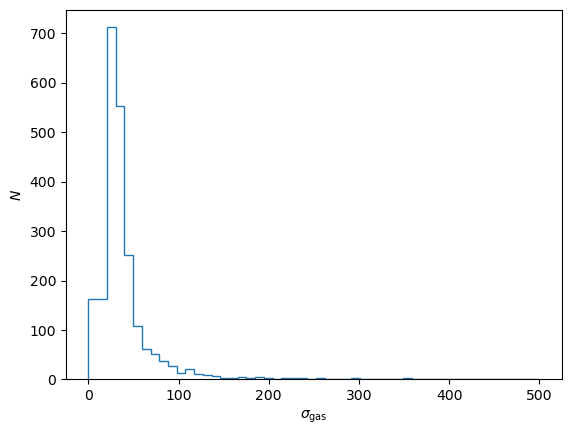

In [11]:
# Histograms showing the distribution in velocity dispersion
import matplotlib.pyplot as plt
from astropy.visualization import hist
fig, ax = plt.subplots(nrows=1, ncols=1)
hist(df[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step")
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")

You can also select a subset of the full data sample as follows:

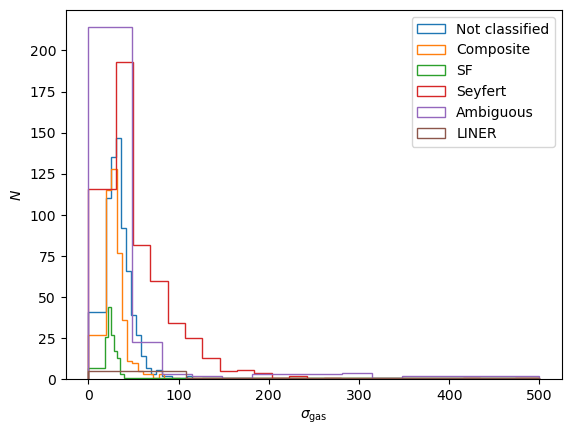

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)
for cat in df["BPT (total)"].unique():
    df_cat = df[df["BPT (total)"] == cat]
    hist(df_cat[f"sigma_gas (component 1)"].values, bins="scott", ax=ax, range=(0, 500), density=False, histtype="step", label=cat)
ax.set_xlabel(r"$\sigma_{\rm gas}$")
ax.set_ylabel(r"$N$")
ax.legend()

## Using `spaxelsleuth.plotting`
--- 
In the below cells, we will demonstrate how to use various functions in `spaxelsleuth.plotting` to make different kinds of plots useful for analysing the data set.

In [14]:
from spaxelsleuth.plotting.plottools import plot_empty_BPT_diagram, plot_BPT_lines
from spaxelsleuth.plotting.plotgalaxies import plot2dhistcontours, plot2dscatter

#### Plot the distribution of spaxels in the WHAN diagram
The WHAN diagram, developed by Cid Fernandes et al. (2010, 2011), plots the H$\alpha$ equivalent width (EW) against the [NII]6583Å/H$\alpha$ line ratio, and can be used to distinguish between emission by star formation, AGN and hot, low-mass evolved stars.

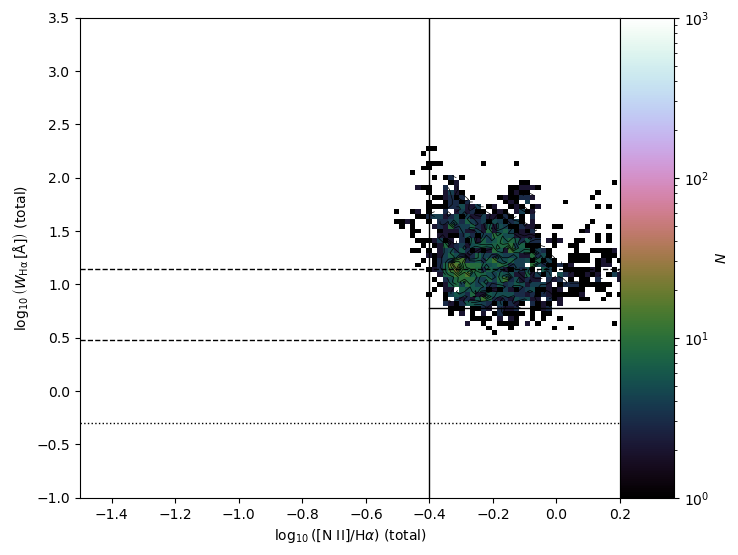

In [15]:
# Plot a 2D histogram showing the distribution of S7 spaxels in the WHAN diagram
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="count", log_z=True,
              plot_colorbar=True)

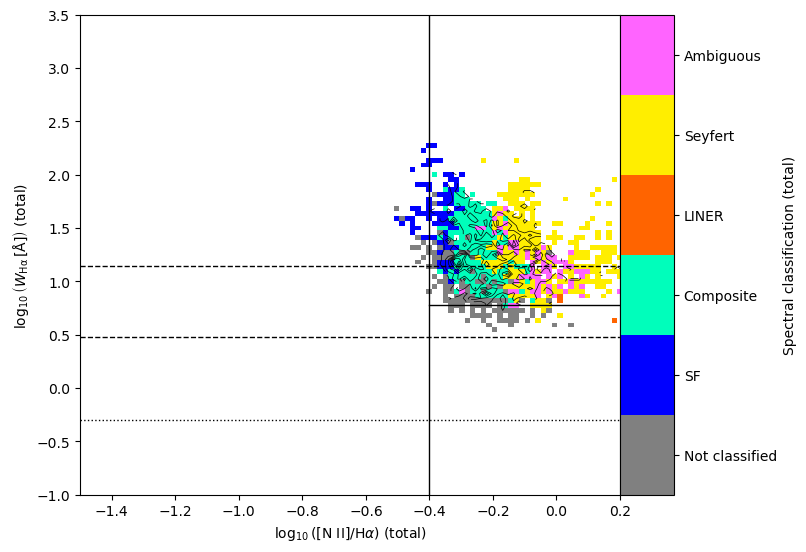

In [16]:
# Repeat the above, but colour by the median BPT classification
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="BPT (total)", 
              plot_colorbar=True)

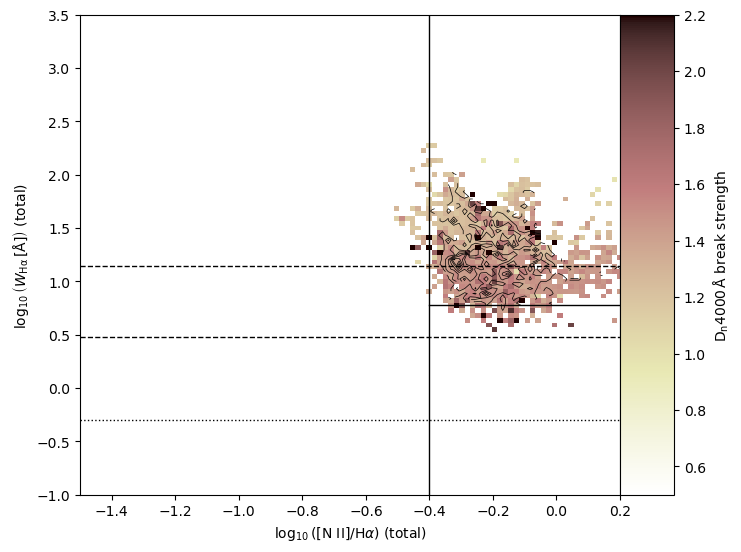

In [17]:
# Repeat the above, but colour by the D4000Å break strength
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)",
              col_y=f"log HALPHA EW (total)",
              col_z="D4000", 
              plot_colorbar=True)

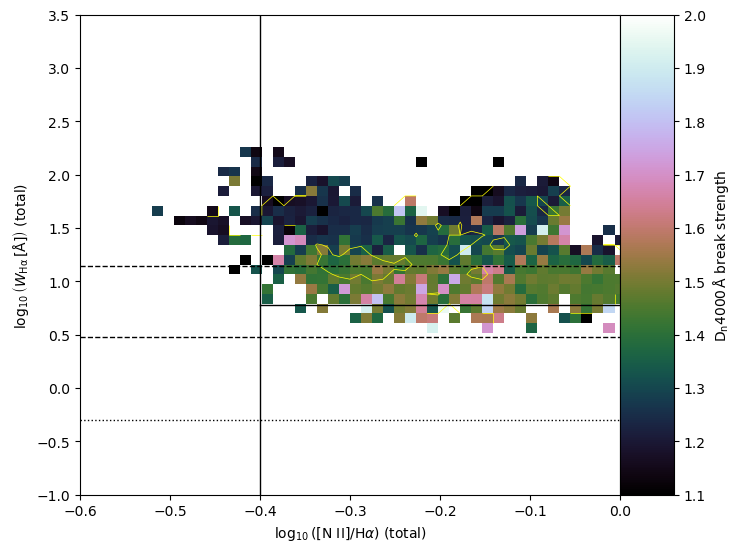

In [18]:
# If we like, we can use a different colourmap using the "cmap" keyword.
# The contour colours can also be changed using the "colors" keyword, and the levels can be changed using "levels".
# The axis limits can also be changed using the "xmin", "xmax", "ymin", "ymax" and "vmin", "vmax" keyword.
# We can also change the number of histogram bins using the "nbins" keyword.
import numpy as np
_ = plot2dhistcontours(df=df,
              col_x=f"log N2 (total)", xmin=-0.6, xmax=0.0,
              col_y=f"log HALPHA EW (total)", 
              col_z="D4000", vmin=1.1, vmax=2.0,
              nbins=50, 
              cmap="cubehelix", colors="yellow", levels=np.logspace(0, 4, 5),
              plot_colorbar=True)

#### Plot optical diagnostic ("BPT") diagrams for the full sample, showing the distribution of spaxels in the S7 galaxies

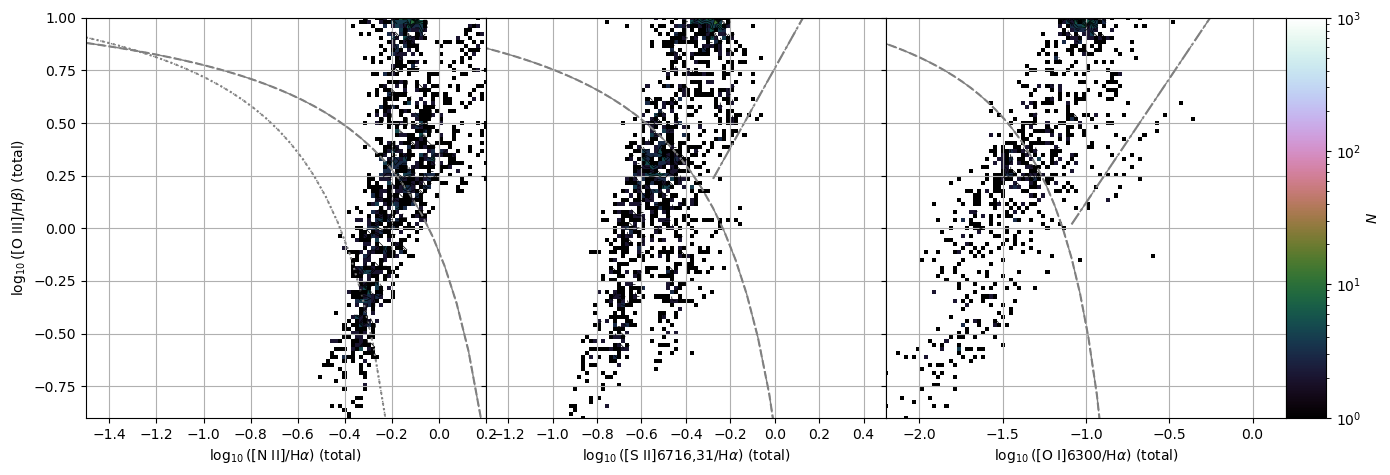

In [19]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  ax=axs_bpt[cc],
                  cax=None,
                  plot_colorbar=True if cc==2 else False)

    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

#### Repeat the above, but colour the histograms by $\sigma_{\rm gas}$

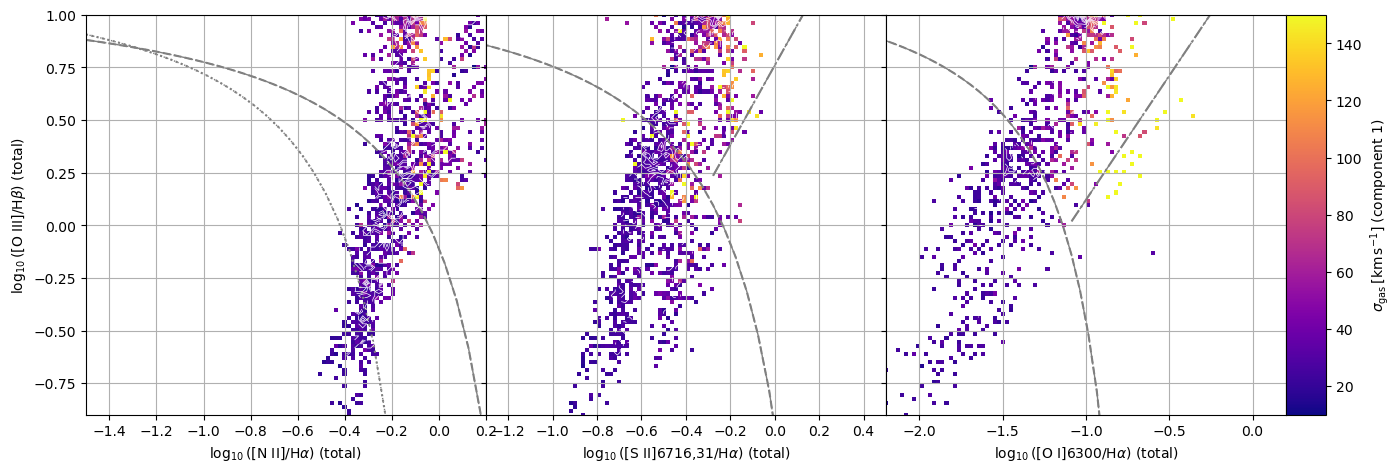

In [20]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="sigma_gas (component 1)", 
                  vmax=150,  # Tweak the z-axis scaling to bring out details 
                  ax=axs_bpt[cc],
                  cax=None, colors="white",
                  plot_colorbar=True if cc==2 else False)
    
    if cc > 0:
        axs_bpt[cc].set_ylabel("")
    axs_bpt[cc].grid()

## Using `spaxelsleuth.plotting` to plot individual galaxies
--- 
In the below cells, we will demonstrate how create plots based on individual S7 galaxies using functions in `spaxelsleuth.plotting`.


In [21]:
gal = "NGC1068"

#### Plot 2D maps showing various quantities in this galaxy
Given a DataFrame corresponding to a single galaxy, `plot2dmap()` reconstructs a 2D image of a specified column (e.g., velocity dispersion) from the rows and plots it. 

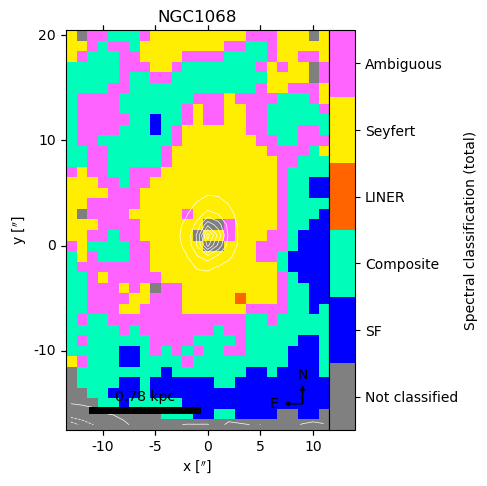

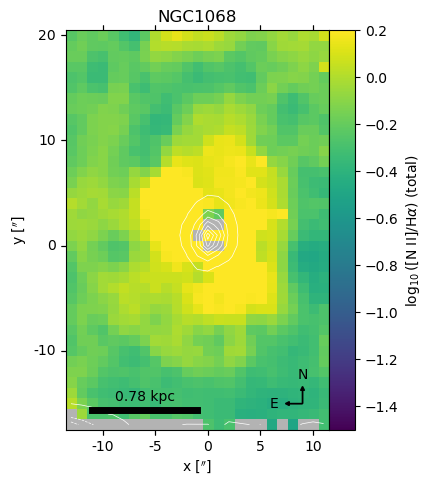

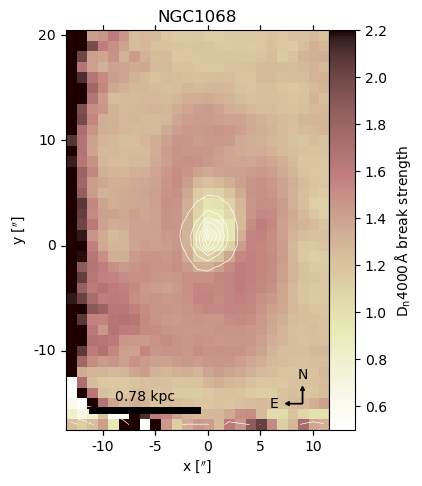

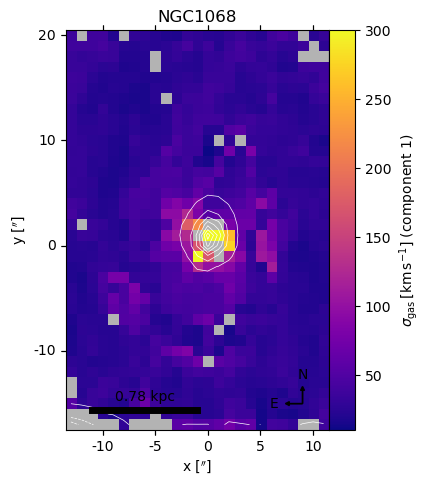

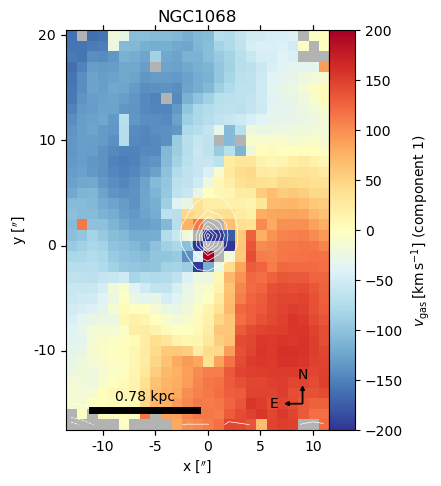

In [22]:
from spaxelsleuth.plotting.plot2dmap import plot2dmap
fig, ax = plot2dmap(df=df, gal=gal, col_z="BPT (total)")
fig, ax = plot2dmap(df=df, gal=gal, col_z="log N2 (total)")
fig, ax = plot2dmap(df=df, gal=gal, col_z="D4000")
fig, ax = plot2dmap(df=df, gal=gal, col_z="sigma_gas (component 1)")
fig, ax = plot2dmap(df=df, gal=gal, col_z="v_gas (component 1)")

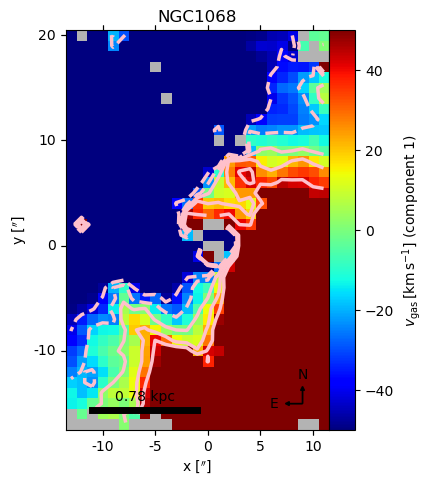

In [23]:
# Playing with input arguments 
# As in plot2dhistcontours, the maximum colour scaling can be set using "vmin" and "vmax" and the colourmap can be changed using "cmap". 
# The quantity that is used to plot contours can be set to any column in the DataFrame using "col_z_contours" and the colours and linewidths can be configured using "colours" and "linewidths".
_ = plot2dmap(df=df, gal=gal, col_z="v_gas (component 1)",
              cmap="jet", vmin=-50, vmax=+50,
              col_z_contours="v_gas (component 1)", levels=[-40, -20, 0, 20, 40], colors="pink", linewidths=2.5)


#### Scatter plots 
Create a BPT diagram with 2D histograms and contours showing the distribution in the full sample, with the data points from this galaxy overlaid on top using a scatter plot.

[Text(0, 0.5, ''), Text(0, 0.5, '')]

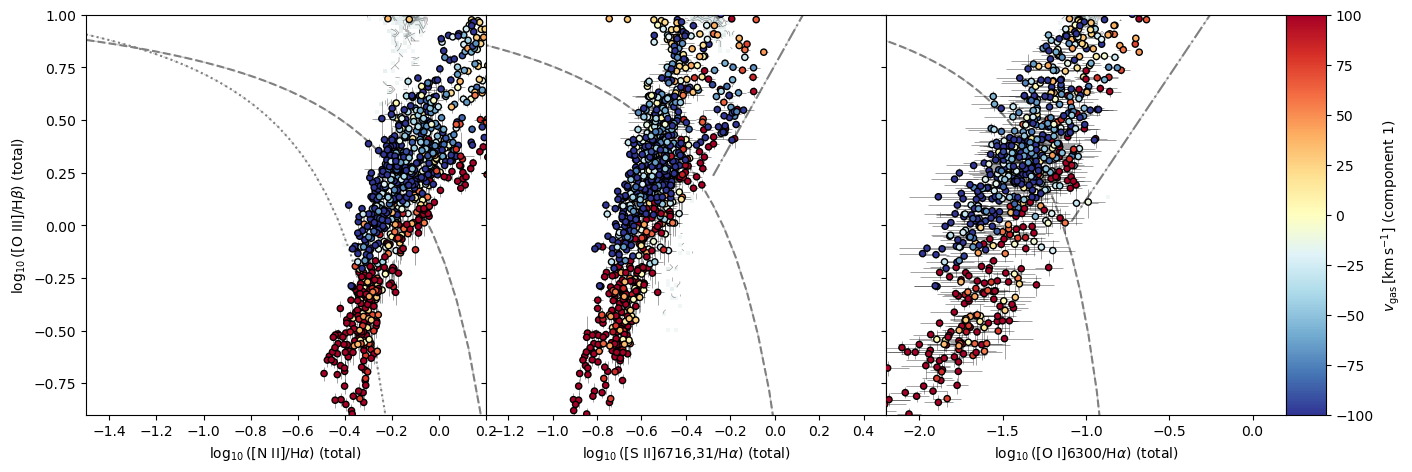

In [24]:
# Plot an empty BPT diagram
fig, axs_bpt = plot_empty_BPT_diagram(nrows=1)

# Plot 2D histograms showing the distribution of the entire sample
for cc, col_x in enumerate(["log N2", "log S2", "log O1"]):
    # Add BPT demarcation lines
    plot_BPT_lines(ax=axs_bpt[cc], col_x=col_x)    

    # Plot histograms showing distribution for whole sample
    _ = plot2dhistcontours(df=df,
                  col_x=f"{col_x} (total)",
                  col_y=f"log O3 (total)",
                  col_z="count", log_z=True,
                  cmap="bone_r", alpha=0.4,
                  ax=axs_bpt[cc],
                  plot_colorbar=False)
    
    # Scatter plot for this galaxy
    _ = plot2dscatter(df=df, gal=gal, 
                      col_x=f"{col_x} (total)",
                      col_y=f"log O3 (total)",
                      col_z=f"v_gas (component 1)",
                      ax=axs_bpt[cc],
                      vmin=-100, vmax=+100,
                      plot_colorbar=True if cc==2 else False)
    
# Turn of y-axis labels 
[ax.set_ylabel("") for ax in axs_bpt[1:]]